# A PyTorch Implementation of Algorithms in Optimal and Adaptive Algorithms for Online Boosting

## Dependencies: 
PyTorch, matplotlib, numpy

## Implementation Note

I consider labels of the form {0, 1} and cast to {-1, +1} where needed. This may not be appropriate or necessary, and may be changed in the future.

## Setup

In [73]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

transform = transforms.Compose(
   [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# get CIFAR10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# classes = ('cat', 'dog', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# create binary dataset 
label1 = 0; label2 = 1 # change if desired
trainset.train_labels = np.array(trainset.train_labels)
testset.test_labels = np.array(testset.test_labels)

# adjust train set
mask = (trainset.train_labels == label1) | (trainset.train_labels == label2)
trainset.train_data=trainset.train_data[mask]
trainset.train_labels=trainset.train_labels[mask]
mask1 = (trainset.train_labels == label1)
mask2 = (trainset.train_labels == label2)
trainset.train_labels[mask1] = 0
trainset.train_labels[mask2] = 1

# duplicate train set with horizontal rotations and shuffle new array
permutation = np.random.permutation(len(trainset.train_labels))
trainset.train_data = np.concatenate([trainset.train_data, 
                                      np.flip(trainset.train_data[permutation], axis=3).copy()], 0)
trainset.train_labels = np.concatenate([trainset.train_labels, trainset.train_labels[permutation].copy()], 0)

# adjust test set
mask = (testset.test_labels == label1) | (testset.test_labels == label2)
testset.test_data=testset.test_data[mask]
testset.test_labels=testset.test_labels[mask]
mask1 = (testset.test_labels == label1)
mask2 = (testset.test_labels == label2)
testset.test_labels[mask1] = 0
testset.test_labels[mask2] = 1

# duplicate test set with horizontal rotations and shuffle new array
permutation = np.random.permutation(len(testset.test_labels))
testset.test_data = np.concatenate([testset.test_data, 
                                    np.flip(testset.test_data[permutation], axis=3).copy()], 0)
testset.test_labels = np.concatenate([testset.test_labels, testset.test_labels[permutation].copy()], 0)

# load datasets for experiments: 1 at a time for training; 8 at a time for testing
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

print("Data loaded:")
print("- Training set size:", len(trainset))
print("- Test set size:", len(testset))

Files already downloaded and verified
Files already downloaded and verified
Data loaded:
- Training set size: 20000
- Test set size: 4000


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x2b617d83e5f8>>
Traceback (most recent call last):
  File "/home/dqi/.conda/envs/py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/dqi/.conda/envs/py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/dqi/.conda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/dqi/.conda/envs/py36/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/dqi/.conda/envs/py36/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/dqi/.conda/envs/py36/lib/python3.6/multiprocessing/resourc

Test Images:


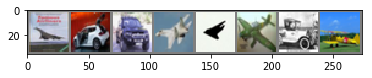

plane   car   car plane plane plane   car plane
Train Images:


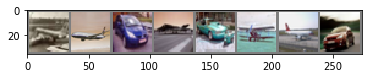

plane plane   car plane   car plane plane   car


Process Process-80:
Process Process-79:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/dqi/.conda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/dqi/.conda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/dqi/.conda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dqi/.conda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dqi/.conda/envs/py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/dqi/.conda/envs/py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/dqi/.conda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 

In [74]:
import matplotlib.pyplot as plt

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random test images
dataiter = iter(testloader)
images = []; labels = []
img_count = 8
for _ in range(img_count):
    image, label = dataiter.next()
    images.append(image)
    labels.append(label)
images = torch.from_numpy(np.concatenate(images, 0))
labels = torch.from_numpy(np.concatenate(labels, 0))

# show images
print("Test Images:")
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(img_count)))

# get some random train images
dataiter = iter(trainloader)
images = []; labels = []
img_count = 8
for _ in range(img_count):
    image, label = dataiter.next()
    images.append(image)
    labels.append(label)
images = torch.from_numpy(np.concatenate(images, 0))
labels = torch.from_numpy(np.concatenate(labels, 0))

# show images
print("Train Images:")
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(img_count)))

## Weak Learners: Neural Nets

In [75]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, architecture=1):
        super(Net, self).__init__()
        assert architecture in [0, 1, 2, 3]
        self.architecture = architecture
        
        # convolutional layers
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        if self.architecture > 0: self.conv2 = nn.Conv2d(6, 16, 5)
        
        # fc for architecture 3
        if self.architecture == 3:
            self.fc3_1 = nn.Linear(16 * 5 * 5, 120)
            self.fc3_2 = nn.Linear(120, 84)
            self.fc3_3 = nn.Linear(84, 2)
        
        # fc for architecture 2
        if self.architecture == 2:
            self.fc2_1 = nn.Linear(16 * 5 * 5, 120)
            self.fc2_2 = nn.Linear(120, 2)
        
        # fc for architecture 1
        if self.architecture == 1: self.fc1_1 = nn.Linear(16 * 5 * 5, 2)
        
        # fc for architecture 0
        if self.architecture == 0: self.fc0_1 = nn.Linear(6 * 14 * 14, 2)      
        
    
    def forward(self, x):
        
        # setup convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        if self.architecture > 0: 
            x = self.pool(F.relu(self.conv2(x)))
            x = x.view(-1, 16 * 5 * 5)
        else:
            x = x.view(-1, 6 * 14 * 14)
            
        # setup fully connected layers
        if self.architecture == 0:
            x = self.fc0_1(x)
        elif self.architecture == 1:
            x = self.fc1_1(x)
        elif self.architecture == 2:
            x = F.relu(self.fc2_1(x))
            x = self.fc2_2(x)
        elif self.architecture == 3:
            x = F.relu(self.fc3_1(x))
            x = F.relu(self.fc3_2(x))
            x = self.fc3_3(x)
        else: raise("Incorrect model id input.")
            
        return x

In [76]:
# loss to use
criterion = nn.CrossEntropyLoss()   

# binomial helper function
def binom(a, b):
    return np.math.factorial(a) / (np.math.factorial(a-b) * np.math.factorial(b))

# get output of weak learner i
# o.w. get output of combination of WLs    
# returns label in {-1, +1}
def predict_WL(weak_learners, x, i=0):
    with torch.no_grad():
        net, _ = weak_learners[i]
        output = net(x)
        _, predict = torch.max(output.data, 1)
        predict = 2 * predict - 1 # map labels to -1, 1
        return predict

# update weak learner i
# accepts y in {0, 1}
def update_WL(weak_learners, x, y, i):
    net, optimizer = weak_learners[i]
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    
# get output of combination of WLs (unweighted)
# returns label in {-1, +1}
def predict_WL_alg1(weak_learners, x):    
    N = len(weak_learners)
    prediction = 0
    for i in range(N):
        prediction += predict_WL(weak_learners, x, i)
    return -1 if (np.sign(prediction) < 0) else 1

# get output of combination of WLs (weighted)
# returns label in {-1, +1}
def predict_WL_alg2(weak_learners, x, alpha, i):
    N = len(weak_learners)
    prediction = 0
    for j in range(0, i+1):
        prediction += alpha[j] * predict_WL(weak_learners, x, j)
    return -1 if (np.sign(prediction) < 0) else 1

# Baseline - Weak Learner

In [77]:
def baseline(weak_learner):
    
    # keep track of metrics every 100 iterations
    n_mistakes = 0    
    n_mistakes_over_time = []
    
    # training
    net, optimizer = weak_learner
    for t, data in enumerate(trainloader, 1):
        x, y = data        
        optimizer.zero_grad()
        output = net(x)        
        loss = criterion(output, y)
        _, predict = torch.max(output.data, 1)
        loss.backward()
        optimizer.step()
        
        n_mistakes += (predict != y).item()
        if t % 100 == 0:
            n_mistakes_over_time.append(n_mistakes)
    
    return np.array(n_mistakes_over_time)

# Online BBM 

In [78]:
def onlineBBM(weak_learners, T):

    # keep track of metrics every 100 iterations
    n_mistakes = 0 
    n_mistakes_WL = np.zeros(len(weak_learners))
    n_mistakes_over_time = []
    
    # parameters
    gamma = 0.05
    N = len(weak_learners)
    s = np.zeros(N+1)
    k = np.zeros(N+1)
    w = np.zeros(N+1)
    max_w = np.zeros(N+1)
    
    # T loop
    for t, data in enumerate(trainloader, 0):
        
        # perform T iterations
        if t >= T: 
            print("Fraction of mistakes at the end of training:", n_mistakes / (T))
            break
        
        # receive example and label
        x, y = data
        
        # predict y
        y_hat = predict_WL_alg1(weak_learners, x)        
        
        # N loop
        for j in range(1,N+1):
            
            # update values
            prediction = predict_WL(weak_learners, x, j-1)
            s[j] = s[j-1] + (2*y-1) * prediction
            k[j] = np.floor((N - j - s[j-1] + 1)/2)
            binom_term = 0 if (k[j] < 0 or k[j] > N - j) else binom(N-j, k[j])
            w[j] = binom_term * np.power(1/2 + gamma/2, k[j]) * np.power(1/2 - gamma/2, N - j - k[j])
            max_w[j] = max(w[j], max_w[j]) 
            
            # count number of mistakes of weak learner
            n_mistakes_WL[j-1] += (prediction != (2*y-1)).item()
            
            # pass training example to WL j with some probability  
            prob = 0 if max_w[j] == 0 else w[j]/max_w[j]
            if np.random.random_sample() < prob:
                update_WL(weak_learners, x, y, j-1)
                
        # evaluate mistakes
        n_mistakes += (y_hat != (2*y-1)).item()
        if (t+1) % 50 == 0:
            n_mistakes_over_time.append(n_mistakes)
        if (t+1) % 1000 == 0:
            print("Fraction of mistakes by time %d" % (t+1), n_mistakes / (t+1))
        
    # output edge of each weak learner
    print("Edges of weak learners:\n", 0.5 - n_mistakes_WL / T)
                
    return n_mistakes_over_time

# AdaBoost OL

In [90]:
def adaboostOL(weak_learners, T):
    
    # keep track of metrics every 100 iterations
    n_mistakes = 0    
    n_mistakes_WL = np.zeros(len(weak_learners))
    n_mistakes_over_time = []
    
    # parameters
    N = len(weak_learners)    
    v = np.ones(N)
    alpha = np.zeros(N)
    y_hat = np.zeros(N+1)
    z = np.zeros(N+1)
    s = np.zeros(N+1)
    
    # T loop
    for t, data in enumerate(trainloader, 1):
        
        # perform T iterations
        if t >= T: 
            print("Fraction of mistakes at the end of training:", n_mistakes / (T))
            break
        
        # receive example and label
        x, y = data
        
        # predict y wrt each WL
        prediction = 0
        for j in range(N):            
            prediction += alpha[j] * predict_WL(weak_learners, x, j)
            y_hat[j] = -1 if (np.sign(prediction) < 0) else 1
            
        # model randomly chooses prediction of some WL
        v = v / np.sum(v)
        idx = np.random.choice(N, size=1, p=v)
        y_hat_final = y_hat[idx]
        
        # N loop
        for j in range(1,N+1):
            
            # set values
            prediction = predict_WL(weak_learners, x, j-1)
            z[j] = (2 * y - 1) * prediction
            s[j] = s[j-1] + alpha[j-1] * z[j]
            alpha[j-1] = max(-2, min(2, alpha[j-1] + (4 * z[j] / np.sqrt(t)) / (1 + np.exp(s[j]))))
            
            # count number of mistakes of weak learner
            n_mistakes_WL[j-1] += (prediction != (2*y-1)).item()
            
            # pass training example to WL j with some probability
            if np.random.random_sample() < 1 / (1 + np.exp(s[j-1])):
                update_WL(weak_learners, x, y, j-1)
                
            # update v
            indic = -1 if (y_hat_final != (2*y-1)) else 0
            v[j-1] = v[j-1] * np.exp(indic)
            
        # evaluate mistakes
        n_mistakes += (y_hat_final != (2*y-1)).item()
        if (t+1) % 50 == 0:
            n_mistakes_over_time.append(n_mistakes)
        if (t+1) % 1000 == 0:
            print("Fraction of mistakes by time %d" % (t+1), n_mistakes / (t+1))
       
    # output edge of each weak learner
    print("Edges of weak learners:\n", 0.5 - n_mistakes_WL / T)
    
    return n_mistakes_over_time, alpha

## Evaluate Models on Test Set

In [80]:
import torch.optim as optim
import matplotlib.pyplot as plt

# plot variables
plt_interval = 50

# Enable GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    print("GPU is available.")

In [81]:
def evaluate_WLs(weak_learners):
    print("EVALUATING WEAK LEARNERS")
    
    for i in range(len(weak_learners)):
        correct = 0
        with torch.no_grad():
            for data in testloader:
                x, y = data
                y = 2 * y - 1
                prediction = predict_WL(weak_learners, x, i)
                correct += (prediction == y).sum().item()
        print('Accuracy of weak learner', i, 'on the 2000 test images: %d %%' % (100 * correct / len(testloader)))
        
def evaluate_model_onlineBBM(weak_learners):
    print("\nEVALUATING MODEL")
    
    N = len(weak_learners)
    correct = 0
    with torch.no_grad():
        for data in testloader: 
            x, y = data
            y = 2 * y - 1
            prediction = predict_WL_alg1(weak_learners, x)
            correct += (prediction == y).sum().item()
    print('Accuracy of the network on the 2000 test images: %d %%' % (100 * correct / len(testloader)))
    
def evaluate_model_adaboostOL(weak_learners, alpha):
    print("\nEVALUATING MODEL")
    
    N = len(weak_learners)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            x, y = data
            y = 2 * y - 1
            prediction = predict_WL_alg2(weak_learners, x, alpha, N-1)
            correct += (prediction == y).sum().item()
    print('Accuracy of the network on the 2000 test images: %d %%' % (100 * correct / len(testloader)))

## Evaluate Models Online

In [84]:
def plot_loss(T, mistakes):
    error_rates = mistakes/ np.arange(plt_interval, T+1, plt_interval)
    plt.plot(np.arange(2*plt_interval, T+1, plt_interval), error_rates[1:])
    plt.title("Fraction of mistakes made online by the strong online learner")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.show()

def evaluate_baseline(architecture):
    print("Evaluating Baseline:")
    
    net = Net(architecture=architecture); print("Weak Learner architecture:\n", net)
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    weak_learner = (net, optimizer)
    mistakes = baseline(weak_learner)
    evaluate_WLs([weak_learner])
    
    # plot results
    plt.plot(mistakes/ np.arange(100, 20001, 100))
    plt.xlabel("Number of Iterations (x100)")
    plt.ylabel("Loss")
    plt.show()
    
def evaluate_onlineBBM(N, T, architecture):
    print("\033[1mEvaluating Online BBM:\n\033[0m")
    
    # initialize N weak learners
    weak_learners = []
    for _ in range(N):
        net = Net(architecture=architecture)    
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
        weak_learners.append((net, optimizer)) 
    print("Weak Learner architecture:\n", net) 
    
    # test
    mistakes = onlineBBM(weak_learners, T)
    print()
    evaluate_WLs(weak_learners)
    print()
    evaluate_model_onlineBBM(weak_learners)
    
    plot_loss(T, mistakes)
    
def evaluate_adaboostOL(N, T, architecture):
    print("\033[1mEvaluating AdaBoost OL:\n\033[0m")
    
    # initialize N weak learners
    weak_learners = []
    for _ in range(N):
        net = Net(architecture=architecture)    
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
        weak_learners.append((net, optimizer)) 
    print("Weak Learner architecture:\n", net)
        
    mistakes, alpha = adaboostOL(weak_learners, T)
    print()
    evaluate_WLs(weak_learners)
    print()
    evaluate_model_adaboostOL(weak_learners, alpha)
    
    plot_loss(T, mistakes)

## Baseline

Evaluating Baseline:
Weak Learner architecture:
 Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc2_1): Linear(in_features=400, out_features=120, bias=True)
  (fc2_2): Linear(in_features=120, out_features=2, bias=True)
)
EVALUATING WEAK LEARNERS
Accuracy of weak learner 0 on the 2000 test images: 90 %


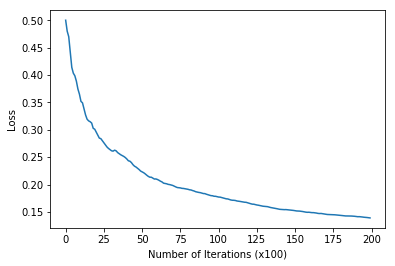

In [85]:
evaluate_baseline(architecture=2)

## Online BBM

Evaluating Online BBM:

Weak Learner architecture:
 Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc2_1): Linear(in_features=400, out_features=120, bias=True)
  (fc2_2): Linear(in_features=120, out_features=2, bias=True)
)
Fraction of mistakes by time 1000 0.332
Fraction of mistakes by time 2000 0.2815
Fraction of mistakes by time 3000 0.2613333333333333
Fraction of mistakes by time 4000 0.2415
Fraction of mistakes by time 5000 0.2254
Fraction of mistakes by time 6000 0.21266666666666667
Fraction of mistakes by time 7000 0.2022857142857143
Fraction of mistakes by time 8000 0.194125
Fraction of mistakes by time 9000 0.18633333333333332
Fraction of mistakes by time 10000 0.1789
Fraction of mistakes by time 11000 0.17227272727272727
Fraction of mistakes by time 12000 0.16641666666666666
Fraction of mistakes by time 13000 0.16

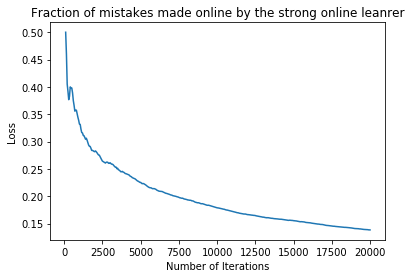

In [86]:
evaluate_onlineBBM(N=5, T=20000, architecture=2)

## Adaboost.OL

Evaluating AdaBoost OL:

Weak Learner architecture:
 Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc2_1): Linear(in_features=400, out_features=120, bias=True)
  (fc2_2): Linear(in_features=120, out_features=2, bias=True)
)
Fraction of mistakes by time 1000 0.389
Fraction of mistakes by time 2000 0.325
Fraction of mistakes by time 3000 0.29033333333333333
Fraction of mistakes by time 4000 0.27375
Fraction of mistakes by time 5000 0.26
Fraction of mistakes by time 6000 0.248
Fraction of mistakes by time 7000 0.23542857142857143
Fraction of mistakes by time 8000 0.22825
Fraction of mistakes by time 9000 0.22144444444444444
Fraction of mistakes by time 10000 0.2152
Fraction of mistakes by time 11000 0.21063636363636365
Fraction of mistakes by time 12000 0.20441666666666666
Fraction of mistakes by time 13000 0.1989230769230769

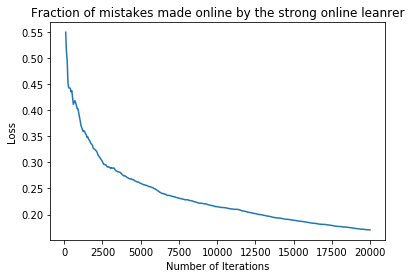

In [91]:
evaluate_adaboostOL(N=5, T=20000, architecture=2)

## Run Experiments

In [88]:
def run_experiment(T=10000, N=10, net=0, model="bbm"):
    evaluate = dict(bbm=evaluate_onlineBBM, adaboost=evaluate_adaboostOL)
    evaluate[model](N, T, net)
    
# net architectures
# 0: 1c1f
# 1: 2c1f
# 2: 2c2f
# 3: 2c3f

Evaluating AdaBoost OL:

Weak Learner architecture:
 Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc2_1): Linear(in_features=400, out_features=120, bias=True)
  (fc2_2): Linear(in_features=120, out_features=2, bias=True)
)
Fraction of mistakes by time 1000 0.412
Fraction of mistakes by time 2000 0.3395
Fraction of mistakes at the end of training: 0.3136
Edges of weak learners:
 [0.1816 0.1344 0.1984 0.0988 0.1496]

EVALUATING WEAK LEARNERS
Accuracy of weak learner 0 on the 2000 test images: 75 %
Accuracy of weak learner 1 on the 2000 test images: 64 %
Accuracy of weak learner 2 on the 2000 test images: 73 %
Accuracy of weak learner 3 on the 2000 test images: 77 %
Accuracy of weak learner 4 on the 2000 test images: 71 %


EVALUATING MODEL
Accuracy of the network on the 2000 test images: 76 %


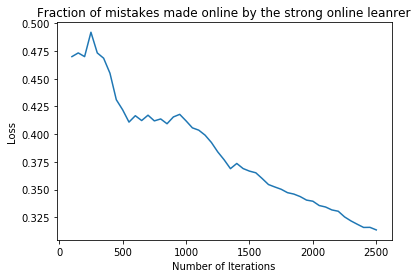

In [92]:
run_experiment(T=2500, N=5, net=2, model="adaboost")

## Citations

Code for CNN: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Online algorithms: http://proceedings.mlr.press/v37/beygelzimer15.pdf